# <font color='Mahogany'> DATA INCUBATOR </font>

## libraries & styles

In [22]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings; warnings.filterwarnings('ignore')

import os ;  import pandas as pd ;  import numpy as np  ; from scipy import stats 
import csv as csv  ; from pandas import ExcelWriter     ; import openpyxl   ;  import datetime
import matplotlib.pyplot as plt; from matplotlib.text import TextPath ; import pylab as pl
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from itertools import permutations
import statistics as stat
from scipy import stats as st

In [24]:
# Figure style

font_axis =  {'fontname':'Times New Roman', 'size':'14', 'weight':'bold'}  
font_title = {'fontname':'Times New Roman', 'size':'16', 'color':'purple', 'weight':'bold', 'verticalalignment':'bottom'}

xlabel_DT  = "plt.xlabel('Date', font_axis)"

legend_ul = "plt.legend(loc='upper left', fontsize = '10')"
legend_ur = "plt.legend(loc='upper right', fontsize = '10')"
legend_o  = "plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = '10')"

grid      = "plt.grid(color='grey', linestyle=':', linewidth=1)"
fig_txt   = "plt.text(text_x, text_y, text , bbox={'facecolor':'red', 'alpha':0.15, 'pad':8}, fontsize=10, style='italic', fontweight='bold')"

## Import data

In [25]:
os.chdir(r"C:\Users\mahta\OneDrive - TRIUMF\Vera_Test_Analysis\DataScience")

try:
    df = pd.read_excel('DI-covid-data.xlsx', sheet_name='RawData', header=0)

except:
    print('Input file does not exist or something else went wrong')
    
df['date'] = df['date'].apply(pd.to_datetime)
df.set_index(keys='date', inplace=True, drop=False)

In [26]:
print('\ndf head is:\n')  
pd.set_option("display.max_columns", 23); pd.set_option("display.max_rows", 120) 
df.head(5)


df head is:



,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,,,
2020-02-24,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,...,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-25,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-26,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-27,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-28,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


## Data structure

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126247 entries, 2020-02-24 to 2021-10-25
Data columns (total 65 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   iso_code                                 126247 non-null  object        
 1   continent                                120534 non-null  object        
 2   location                                 126247 non-null  object        
 3   date                                     126247 non-null  datetime64[ns]
 4   total_cases                              119356 non-null  float64       
 5   new_cases                                119352 non-null  float64       
 6   new_cases_smoothed                       118338 non-null  float64       
 7   total_deaths                             108413 non-null  float64       
 8   new_deaths                               108566 non-null  float64       
 9   new_deaths

## Visualization and exploration 


Showing data between:  2020-01-01 00:00:00  to  2021-10-25 00:00:00 , duration =  663 days, 0:00:00


Text(0, 0.5, 'positive_rate')

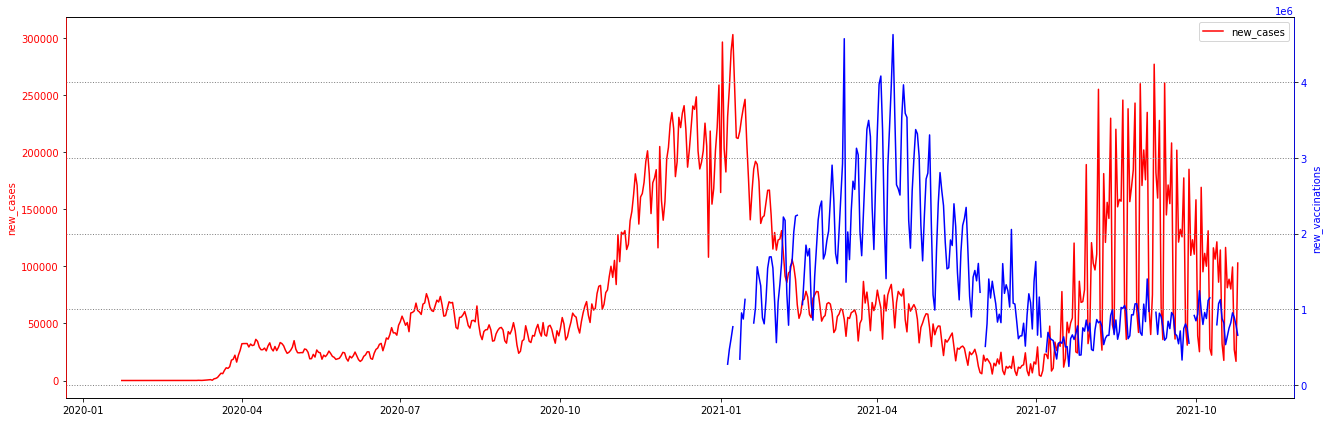

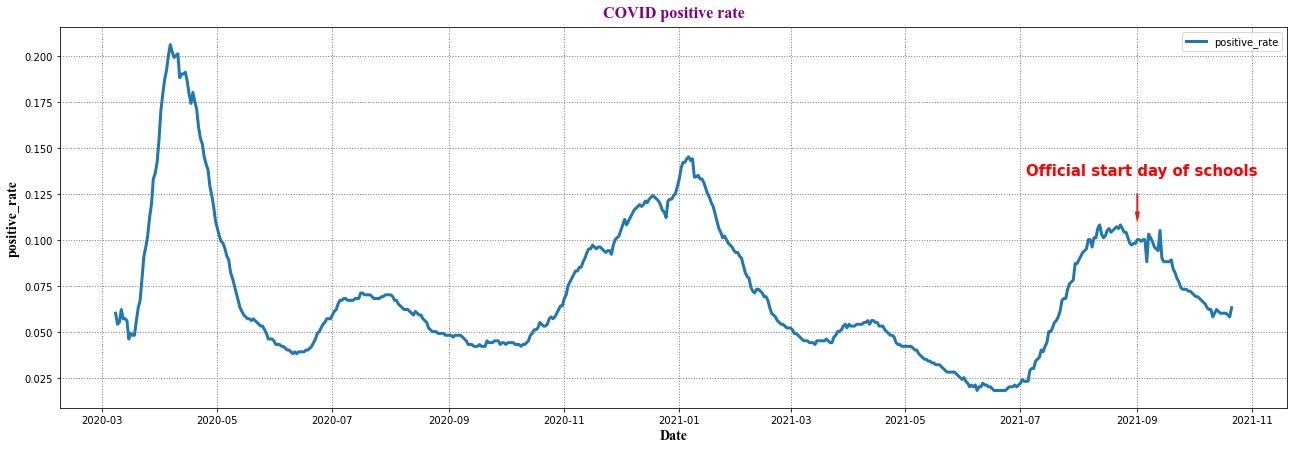

In [28]:
US = df[(df['location']=='United States')] 
#print('\nUS head is:\n', US.head(5))    

start = datetime.datetime(2020,1,1)
end   = datetime.datetime(2021,10,25)
print('\nShowing data between: ',start, ' to ', end, ', duration = ', end-start)

US_time = US[(US['date']>= start) & (US['date']<= end)] 
#print('\nUS_time head is:\n', US_time.head(5))   

fig, ax1 = plt.subplots(figsize=(22,7)) 
ax2=ax1.twinx()

ax1.plot(US_time.new_cases, color='r', label='new_cases')
ax1.set_ylabel('new_cases', color='r')
ax1.tick_params(axis='y', labelcolor='r')
ax1.legend()

ax2.plot(US_time.new_vaccinations, color='b', label='new_vaccinations')
ax2.set_ylabel('new_vaccinations', color='b')
ax2.tick_params(axis='y', labelcolor='b')

ax2.spines['left'].set_color('r')
ax2.spines['right'].set_color('b')
ax2.set_xlabel('Date', color='k')


exec(grid)

start = datetime.datetime(2020,1,1)
end   = datetime.datetime(2021,10,25)
US_time = US[(US['date']>= start) & (US['date']<= end)] 

plt.figure(figsize=(22,7)) 
plt.plot(US_time.positive_rate, linewidth=3, label='positive_rate')
plt.arrow(datetime.datetime(2021,9,1), 0.125, 0, -0.01, width=0.5, head_width=2, head_length=0.005, color="r")
plt.annotate('Official start day of schools', xy = (datetime.datetime(2021,7,4), 0.135), size=15, weight='bold', color="r")

plt.title('COVID positive rate' , font_title)
exec(xlabel_DT); exec(legend_ur); exec(grid)
plt.ylabel('positive_rate', font_axis)


## Hypothesis testing (20 days interval)

slope (before opening) is: -0.0010384615384615376
slope (after opening)  is: -0.00021818181818181865
slope change percentage:  -78.98989898989893


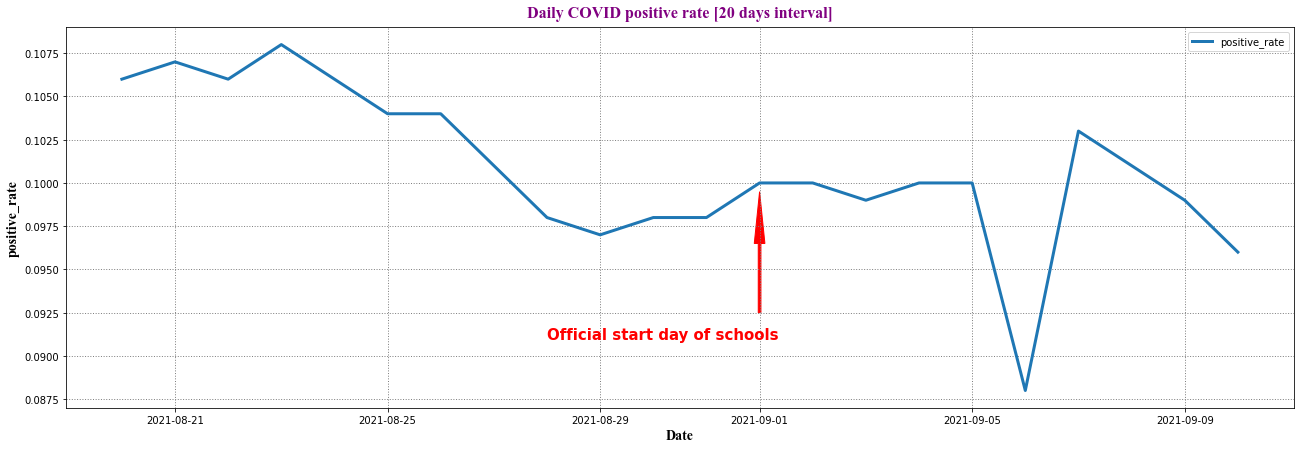

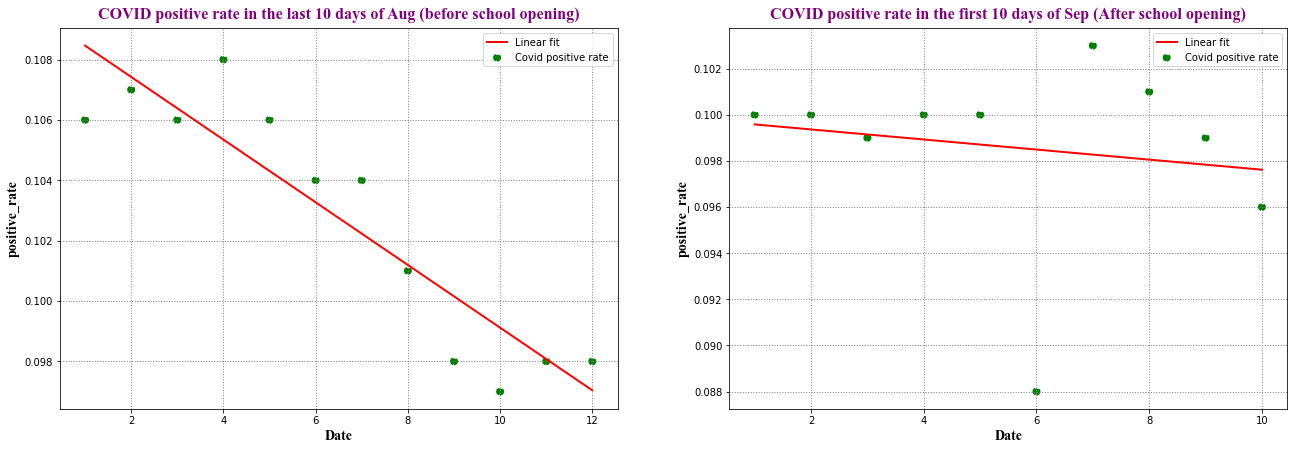

In [29]:
# total interval
US_time = US[(US['date']>= datetime.datetime(2021,8,20)) & (US['date']<= datetime.datetime(2021,9,10))] 

plt.figure(figsize=(22,7)) 
plt.plot(US_time.positive_rate, linewidth=3, label='positive_rate')
plt.arrow(datetime.datetime(2021,9,1), 0.0925, 0, 0.004, width=5e-2, head_width=2e-1, head_length=0.003, color="r")
plt.annotate('Official start day of schools', xy = (datetime.datetime(2021,8,28), 0.091), size=15, weight='bold', color="r")

plt.title('Daily COVID positive rate [20 days interval]' , font_title)
exec(xlabel_DT); exec(legend_ur); exec(grid)
plt.ylabel('positive_rate', font_axis)

# ----------------------------
# Befor school opening
y = US[(US['date']>= datetime.datetime(2021,8,20)) & (US['date']<= datetime.datetime(2021,8,31))]['positive_rate']
x = list(range(1,len(y)+1))
#print('lenght of x is:', len(x)) ; print('x is: \n',x) 
#print('lenght of y is:', len(y)) ; print('y is: \n',y)  

slope1, intercept, r_value, p_value, std_err = st.linregress(x,y)
yfit = [i*slope1+intercept for i in x]
print('slope (before opening) is:', slope1)

plt.figure(figsize=(22,7))
plt.subplot(121)
plt.scatter(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, label='Covid positive rate')
plt.plot(x, yfit, color='red', linestyle='solid', linewidth=2, label='Linear fit')
plt.title('COVID positive rate in the last 10 days of Aug (before school opening)' , font_title)
exec(xlabel_DT); exec(legend_ur); exec(grid); plt.ylabel('positive_rate', font_axis)

# ----------------------------
# After school opening
y = US[(US['date']>= datetime.datetime(2021,9,1)) & (US['date']<= datetime.datetime(2021,9,10))]['positive_rate']
x = list(range(1,len(y)+1))

slope2, intercept, r_value, p_value, std_err = st.linregress(x,y)
yfit = [i*slope2+intercept for i in x]

print('slope (after opening)  is:', slope2)
#print(yfit)

plt.subplot(122)
plt.scatter(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, label='Covid positive rate')
plt.plot(x, yfit, color='red', linestyle='solid', linewidth=2, label='Linear fit')
plt.title('COVID positive rate in the first 10 days of Sep (After school opening)' , font_title)
exec(xlabel_DT); exec(legend_ur); exec(grid); plt.ylabel('positive_rate', font_axis)

# ----------------------------

delta = ((slope2 - slope1)/slope1)*100
print('slope change percentage: ', delta)

## Hypothesis testing (100 days interval)

slope (before opening) is: 0.0013857442348008387
slope (after opening)  is: -0.0010131092436974792
slope change percentage:  -173.10939625471974


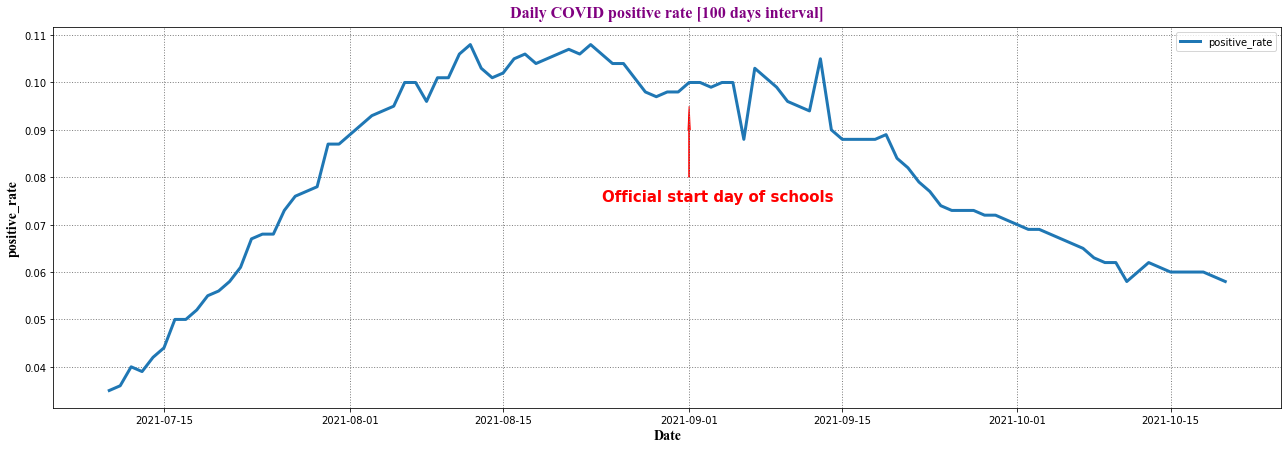

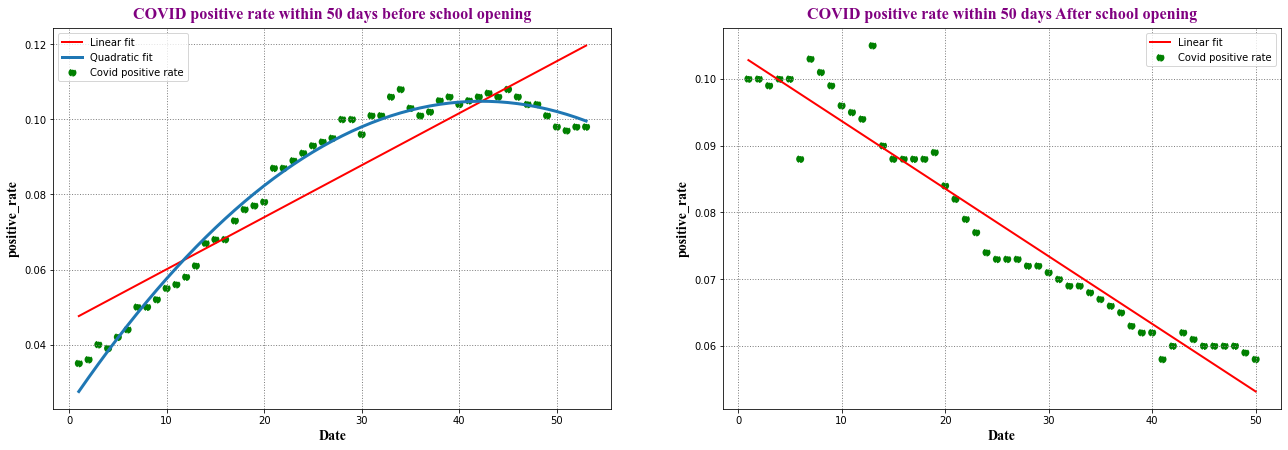

In [30]:
# total interval
US_time = US[(US['date']>= datetime.datetime(2021,7,10)) & (US['date']<= datetime.datetime(2021,10,20))] 

plt.figure(figsize=(22,7)) 
plt.plot(US_time.positive_rate, linewidth=3, label='positive_rate')
plt.arrow(datetime.datetime(2021,9,1), 0.08, 0, 0.01, width=5e-2, head_width=2e-1, head_length=0.005, color="r")
plt.annotate('Official start day of schools', xy = (datetime.datetime(2021,8,24), 0.075), size=15, weight='bold', color="r")

plt.title('Daily COVID positive rate [100 days interval]' , font_title)
exec(xlabel_DT); exec(legend_ur); exec(grid)
plt.ylabel('positive_rate', font_axis)

# ----------------------------
# Befor school opening
y = US[(US['date']>= datetime.datetime(2021,7,10)) & (US['date']<= datetime.datetime(2021,8,31))]['positive_rate']
x = list(range(1,len(y)+1))

#linear fit
slope1, intercept, r_value, p_value, std_err = st.linregress(x,y)
yfit = [i*slope1+intercept for i in x]
print('slope (before opening) is:', slope1)

#quadratic fit
model = np.poly1d(np.polyfit(x, y, 2))

plt.figure(figsize=(22,7))
plt.subplot(121)
plt.scatter(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, label='Covid positive rate')
plt.plot(x, yfit, color='red', linestyle='solid', linewidth=2, label='Linear fit')
plt.plot(x, model(x),linewidth=3,label='Quadratic fit')

plt.title('COVID positive rate within 50 days before school opening' , font_title)
exec(xlabel_DT); exec(legend_ul); exec(grid); plt.ylabel('positive_rate', font_axis)

# ----------------------------
# After school opening
y = US[(US['date']>= datetime.datetime(2021,9,1)) & (US['date']<= datetime.datetime(2021,10,20))]['positive_rate']
x = list(range(1,len(y)+1))

slope2, intercept, r_value, p_value, std_err = st.linregress(x,y)
yfit = [i*slope2+intercept for i in x]

print('slope (after opening)  is:', slope2)
#print(yfit)

plt.subplot(122)
plt.scatter(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, label='Covid positive rate')
plt.plot(x, yfit, color='red', linestyle='solid', linewidth=2, label='Linear fit')
plt.title('COVID positive rate within 50 days After school opening' , font_title)
exec(xlabel_DT); exec(legend_ur); exec(grid); plt.ylabel('positive_rate', font_axis)

# ----------------------------

delta = ((slope2 - slope1)/slope1)*100
print('slope change percentage: ', delta)